In [10]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
iris=pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class']= load_iris().target
iris['class']=iris['class'].map({0:'Setosa',1:'Versicolour',2:'Virginica'})
x=iris.drop(columns='class')
from sklearn.preprocessing import StandardScaler

x=StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca=PCA(n_components=4)
pca_fit=pca.fit(x)
print('EigenValue',pca_fit.singular_values_)
print('Variance Expe',pca_fit.explained_variance_)

EigenValue [20.92306556 11.7091661   4.69185798  1.76273239]
Variance Expe [2.93808505 0.9201649  0.14774182 0.02085386]


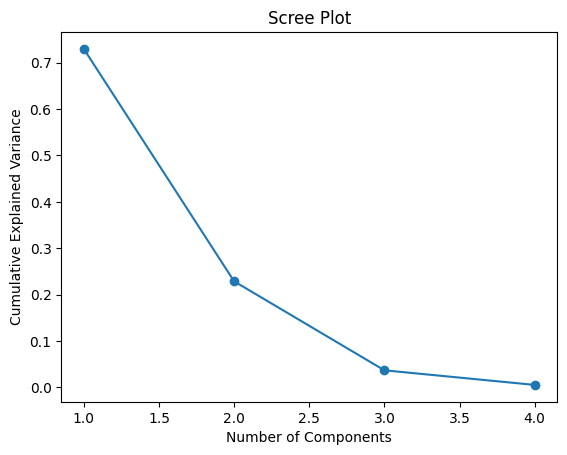

In [14]:
import matplotlib.pyplot as plt
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(range(1,5),pca_fit.explained_variance_ratio_,'o-')
plt.show()

In [12]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])

pca = PCA()
pca.fit(X)

print("Eigenvalues (numpy):", np.linalg.eig(np.cov(X.T))[0])
print("explained_variance_ :", pca.explained_variance_)
print("explained_variance_ratio_ :", pca.explained_variance_ratio_)

Eigenvalues (numpy): [1.73707382 0.05392618]
explained_variance_ : [1.73707382 0.05392618]
explained_variance_ratio_ : [0.96989047 0.03010953]


<Axes: title={'center': '2 comp PCA'}, xlabel='pc1', ylabel='pc2'>

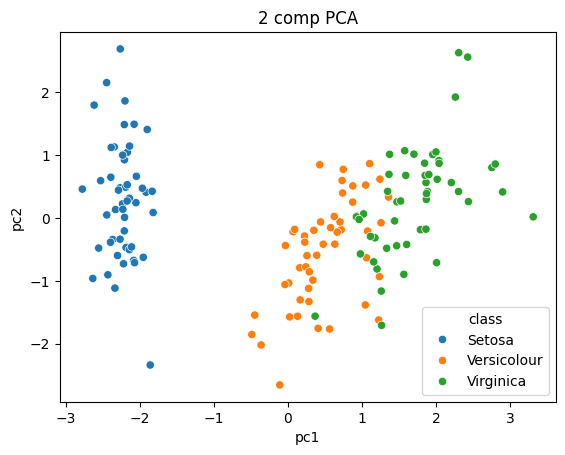

In [18]:
import seaborn as sns

plt.title('2 comp PCA')
sns.scatterplot(x='pc1',
                y='pc2',
                hue=iris['class'], 
                data=pd.DataFrame(pca_fit.transform(x),columns=['pc1','pc2','pc3','pc4']))